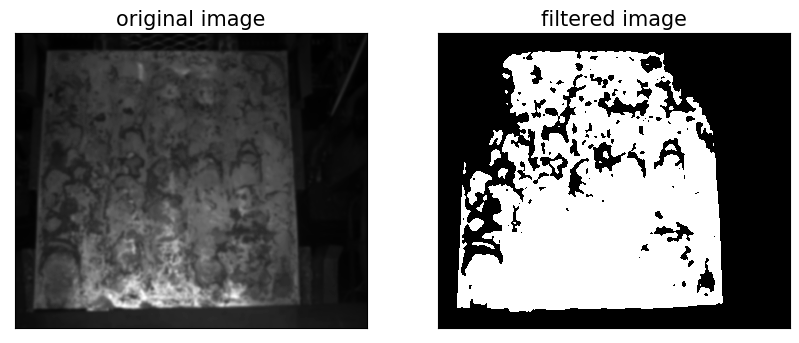

In [72]:
import cv2
import matplotlib.pyplot as plt

## 이미지 불러오기
image = cv2.imread('/root/MZC_Yubin/Sorin/dataset_220524/B_Swoot/Sheet_0017_Camera_03_First_Top_Grab.bmp', cv2.IMREAD_GRAYSCALE)

## 가우시안 블러
k_size = 51
image = cv2.GaussianBlur(image, ksize=(k_size,k_size), sigmaX=0)

## 이미지 이진화
thresh = 50 ## 임계값
maxValue = 255 ## 적용할 value
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_BINARY) 

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=15)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('filtered image',fontsize=15)
plt.xticks([]), plt.yticks([])
plt.show()

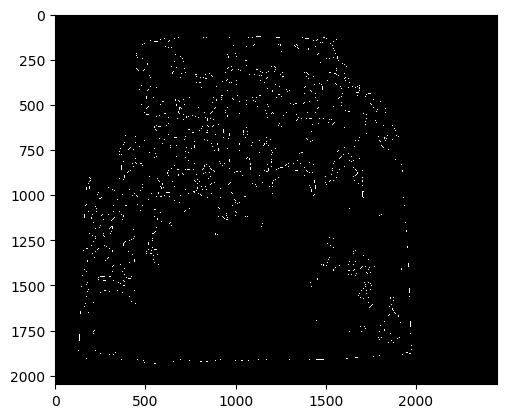

In [73]:
thres_size = 1

edged = cv2.Canny(dst, thres_size, thres_size)
plt.imshow(edged,cmap='gray')
plt.show()

In [74]:
contours, _ = cv2.findContours(dst,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_xy = np.array(contours)

# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


129
1975
125
1936


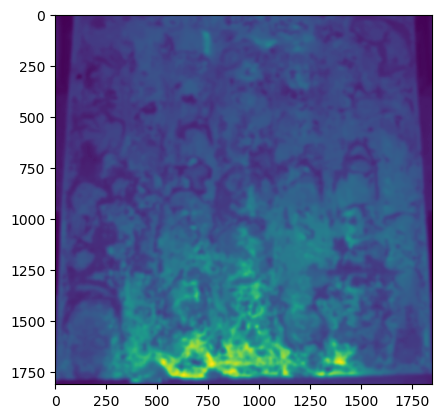

In [75]:
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

mg_trim = image[y:y+h, x:x+w]

plt.imshow(mg_trim)
plt.show()

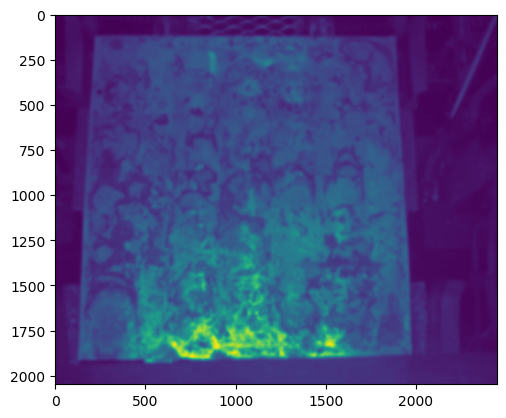

In [76]:
plt.imshow(image)
plt.show()